In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('/Users/tonyjason/Downloads/bank.csv')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
#No null values in dataset
#Classify the columns into categorical and numerical columns

In [6]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 10 categorical variables

The categorical variables are :

 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


In [7]:
#Value count of unique values in categorical data
 
for each in categorical:
    print(dataset[each].value_counts())

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
no     10994
yes      168
Name: default, dtype: int64
no     5881
yes    5281
Name: housing, dtype: int64
no     9702
yes    1460
Name: loan, dtype: int64
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64
unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64
no     5873
yes    5289
Name: d

In [8]:
# There are no null values but there are significant unknown values in few categorical columns
#poutcome has high count of unknown values so that field can be dropped.
#Rest of the unknown values can be replaced by their mode values in their respective fields
for each in categorical:
    mode = dataset[each].mode()[0]
    dataset[each].replace(to_replace = 'unknown',value = mode,inplace = True)

In [9]:
dataset[categorical].head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,cellular,may,unknown,yes
1,admin.,married,secondary,no,no,no,cellular,may,unknown,yes
2,technician,married,secondary,no,yes,no,cellular,may,unknown,yes
3,services,married,secondary,no,yes,no,cellular,may,unknown,yes
4,admin.,married,tertiary,no,no,no,cellular,may,unknown,yes


In [10]:
for each in categorical:
    print(dataset[each].value_counts())

management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64
no     10994
yes      168
Name: default, dtype: int64
no     5881
yes    5281
Name: housing, dtype: int64
no     9702
yes    1460
Name: loan, dtype: int64
cellular     10388
telephone      774
Name: contact, dtype: int64
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64
unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64
no     5873
yes    5289
Name: deposit, dtype: int64


In [11]:
numeric = [var for var in dataset.columns if dataset[var].dtype!='O']

print('There are {} numeric variables\n'.format(len(numeric)))

print('The numeric variables are :\n\n', numeric)

There are 7 numeric variables

The numeric variables are :

 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [12]:
dataset[numeric].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       11162 non-null  int64
 1   balance   11162 non-null  int64
 2   day       11162 non-null  int64
 3   duration  11162 non-null  int64
 4   campaign  11162 non-null  int64
 5   pdays     11162 non-null  int64
 6   previous  11162 non-null  int64
dtypes: int64(7)
memory usage: 610.5 KB


In [13]:
X = dataset.drop(['poutcome','deposit','contact'],axis=1).values
Y = dataset['deposit'].values

In [14]:
dataset[numeric].head()

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0


In [15]:
#Encoding categorical data with numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for each in categorical:
    dataset[each] = label_encoder.fit_transform(dataset[each])
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,0,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,0,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,0,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,0,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,0,5,8,673,2,-1,0,3,1


<AxesSubplot:>

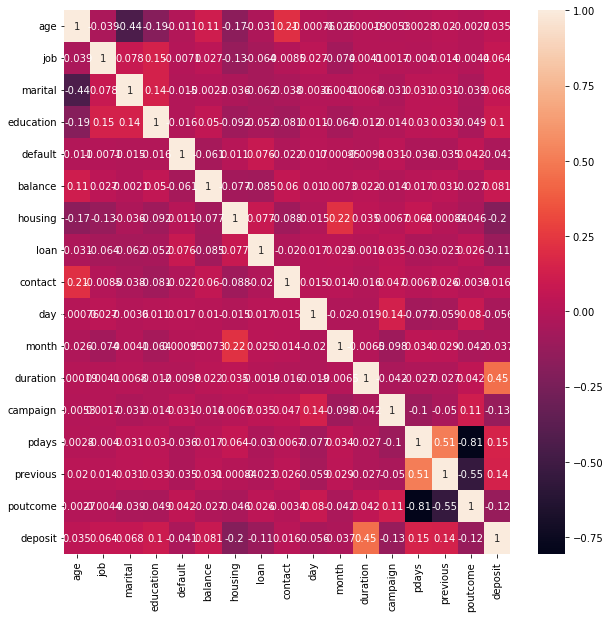

In [16]:
import seaborn as sn
corr_matrix = dataset.corr()
plt.figure(figsize = (10,10))

sn.heatmap(corr_matrix, annot=True)


In [173]:
#Feature Scaling the values
Y = dataset['deposit'].values
cols = dataset.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
dataset = scaler.fit_transform(dataset)

dataset = pd.DataFrame(dataset, columns=[cols])

In [174]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1.176471,-0.666667,0.0,0.0,0.0,1.130517,1.0,0.0,0.0,-0.714286,0.4,2.198324,-0.5,0.0,0.0,0.0,1.0
1,1.000000,-0.666667,0.0,0.0,0.0,-0.318411,0.0,0.0,0.0,-0.714286,0.4,3.385475,-0.5,0.0,0.0,0.0,1.0
2,0.117647,0.833333,0.0,0.0,0.0,0.453972,1.0,0.0,0.0,-0.714286,0.4,3.167598,-0.5,0.0,0.0,0.0,1.0
3,0.941176,0.500000,0.0,0.0,0.0,1.214376,1.0,0.0,0.0,-0.714286,0.4,0.905028,-0.5,0.0,0.0,0.0,1.0
4,0.882353,-0.666667,0.0,1.0,0.0,-0.230769,0.0,0.0,0.0,-0.714286,0.4,1.167598,0.0,0.0,0.0,0.0,1.0


In [175]:
Y
X = dataset.drop(['poutcome','deposit','contact'],axis=1).values

/var/folders/16/84_yc3ks3_56wmdv0rgc67b40000gn/T/ipykernel_10441/1081118766.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = dataset.drop(['poutcome','deposit','contact'],axis=1).values


In [176]:
X

array([[ 1.17647059, -0.66666667,  0.        , ..., -0.5       ,
         0.        ,  0.        ],
       [ 1.        , -0.66666667,  0.        , ..., -0.5       ,
         0.        ,  0.        ],
       [ 0.11764706,  0.83333333,  0.        , ..., -0.5       ,
         0.        ,  0.        ],
       ...,
       [-0.41176471,  0.83333333,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23529412,  0.83333333,  0.        , ...,  0.        ,
         7.95402299,  5.        ],
       [-0.29411765,  0.83333333,  0.        , ..., -0.5       ,
         0.        ,  0.        ]])

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [178]:
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [179]:
y_pred = gnb.predict(X_test)

y_pred

array([1, 0, 0, ..., 0, 1, 1])

In [180]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7474


In [181]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0, 1, 1, ..., 0, 0, 1])

In [182]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7580


In [183]:
y_test.value_counts()
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [184]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1335  457]
 [ 389 1168]]

True Positives(TP) =  1335

True Negatives(TN) =  1168

False Positives(FP) =  457

False Negatives(FN) =  389


<AxesSubplot:>

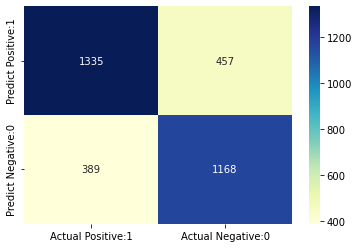

In [187]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [188]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))


Classification accuracy : 0.7474
Classification error : 0.2526
Precision : 0.7450
Recall or Sensitivity : 0.7744
True Positive Rate : 0.7744
False Positive Rate : 0.2812
Specificity : 0.7188
